In [29]:
import sys
sys.path.append("..")
import seaborn as sns
import matplotlib.pyplot as plt
from estim8 import *
import pandas as pd

In [30]:
# load FMU model
model_path = "../examples/SimpleBatch.fmu"
model = models.FmuModel(model_path)

# load experimental data
data = pd.read_excel("../examples/SimpleBatch_data.xlsx")

## Figure FMU model simulations 

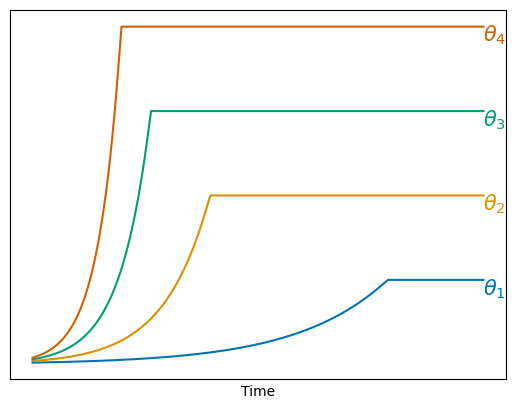

In [26]:
params = [{par: val*i for par, val in model.parameters.items() if par in ["mu_max", "X0", "Y_XS"]} for i in range(1, 5)]

sims = [
    model.simulate(t0=0, t_end=10, stepsize=1e-3, parameters= parameters, observe=["X"])
    for parameters in params
]
fig, ax = plt.subplots()
for i, (sim, color) in enumerate(zip(sims, sns.color_palette("colorblind"))):
    visualization.plot_model_prediction(ax, sim["X"], color=color)
    # Add text annotation with theta_i
    last_x = sim["X"].timepoints[-1]
    last_y = sim["X"].values[-1]
    ax.text(last_x , last_y-0.9, fr'$\theta_{i+1}$', fontsize=15, color=color)

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel("Time")

fig.savefig("FmuModel_simulation.svg")

## Figure Model fitting 

In [ ]:
estimates, _ = estim8.Estimator(model, data, ).estimate()